In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris-dataset

In [2]:
from sklearn.datasets import load_iris

In [7]:
data = load_iris()
df = pd.DataFrame(data["data"],columns=data["feature_names"])
df["class"] = data["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


columnの意味
- sepal length : がく片の長さ
- sepal width : がく片の幅
- petal length : 花弁の長さ
- petal width : 花弁の幅

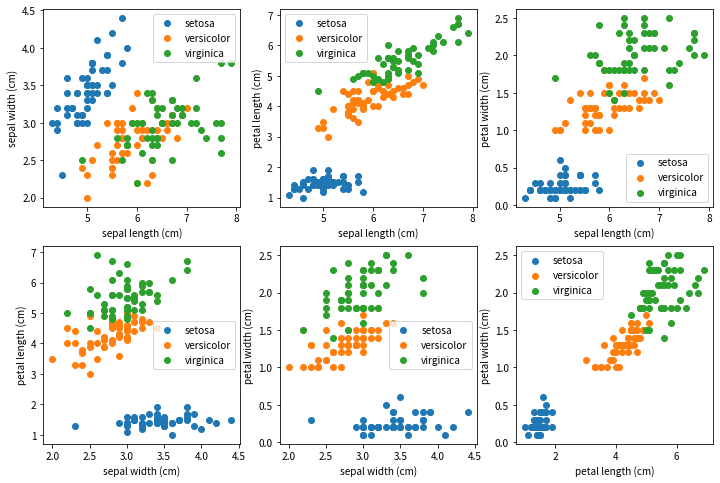

In [53]:
import itertools

plt.figure(facecolor="white",figsize=(12,8))
pair = list(itertools.combinations(data["feature_names"],2))
for i,cols in enumerate(pair):
    plt.subplot(2,3,i+1)
    plt.scatter( df.loc[df["class"]==0,cols[0]],df.loc[df["class"]==0,cols[1]],label='setosa')
    plt.scatter( df.loc[df["class"]==1,cols[0]],df.loc[df["class"]==1,cols[1]],label='versicolor')
    plt.scatter( df.loc[df["class"]==2,cols[0]],df.loc[df["class"]==2,cols[1]],label='virginica')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend()
plt.show()

グラフから読み取れること : petal lengthが2未満かどうかで, setosaとそれ以外のirisを完全に分離できる. versicolorとvirginicaを完全に分離することは難しい. ここでは, petal widthが1.7より大きいかどうかで, versicolorかvirginicaを決めるようにすると, 簡単な分類器が作成できる.

# seeds-dataset
https://archive.ics.uci.edu/ml/datasets/seeds

In [64]:
df = pd.read_csv("seeds_dataset.txt",sep="\t",header=None)
df = df.rename(columns={0:"area",1:"perimeter",2:"compactness",3:"length of kernel",4:"width of kernel",5:"asymmetry coefficient",
             6:"length of kernel groove",7:"class"})
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


columnの意味
- area : 面積
- perimeter : 周囲の長さ
- compactness : 密集度 = $4\pi×area/perimeter^2$
- length of kernel : 長さ
- width of kernel : 幅
- asymmetry coefficient : 非対称係数
- length of kernel groove : 殻溝の長さ

## 最近傍法(KNN : k=1)

In [72]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["class"])
y = df["class"]
X = X.to_numpy()
y = y.to_numpy()

X_train,X_valid,y_train,y_valid = train_test_split(X,y)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 1
model = KNeighborsClassifier(k,weights='distance')
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
print("train acc : ",accuracy_score(y_train,y_train_pred))
print("valid acc : ",accuracy_score(y_valid,y_valid_pred))

train acc :  1.0
valid acc :  0.8679245283018868
